In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Phase 1 - A

In [98]:
df = pd.read_csv('reviews3.csv')

In [99]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,21183,B002QWP89S,A8NX9GKEUAG8U,S. Kim,0,0,5,1333324800,Dog goes crazy over these!,My dog has been loving these chews for years! ...
1,24619,B0047E2I5U,A74ZHK7QFVQ29,Artìst,1,1,5,1305072000,My Westie loves it!,I have a 6 year old westie that had the worst ...
2,18727,B000FFRU3U,A3K7XR1T8LBTB,K. Frappier,9,9,5,1173657600,My favorite instant oatmeal so far.,"I love Dr. McDougall's products, and this is m..."
3,36130,B000FBQ594,A2GJSO5UUMNLX0,Sunny,1,1,5,1182816000,Excellent cookie,"Wow, was I surprised when I first bit into one..."
4,3304,B005K4Q1VI,A1TOW634MZ0ELQ,kathyallen45,0,0,5,1328659200,Hot Choc K Cup,Wow what a deal. These taste just as good as t...


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7658 entries, 0 to 7657
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      7658 non-null   int64 
 1   ProductId               7658 non-null   object
 2   UserId                  7658 non-null   object
 3   ProfileName             7658 non-null   object
 4   HelpfulnessNumerator    7658 non-null   int64 
 5   HelpfulnessDenominator  7658 non-null   int64 
 6   Score                   7658 non-null   int64 
 7   Time                    7658 non-null   int64 
 8   Summary                 7657 non-null   object
 9   Text                    7658 non-null   object
dtypes: int64(5), object(5)
memory usage: 598.4+ KB


In [101]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,7658.000000,7658.000000,7658.000000,7658.000000,7.658000e+03
mean,24951.374380,1.676547,2.252285,3.827239,1.295600e+09
std,14384.295842,5.863804,6.737611,1.435316,4.649418e+07
min,6.000000,0.000000,0.000000,1.000000,1.067645e+09
25%,12670.500000,0.000000,0.000000,3.000000,1.271052e+09
50%,24694.000000,0.000000,1.000000,4.000000,1.308701e+09
75%,37480.750000,2.000000,2.000000,5.000000,1.330387e+09
max,49993.000000,187.000000,216.000000,5.000000,1.351210e+09


In [102]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   1
Text                      0
dtype: int64

In [103]:
df.duplicated().sum()

0

Phase 1 - B

Distro of ratings

<Axes: xlabel='Score', ylabel='count'>

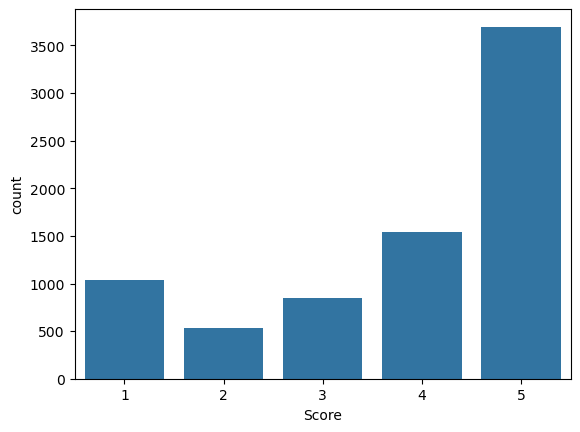

In [104]:
sns.barplot(df['Score'].value_counts())

In [105]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,21183,B002QWP89S,A8NX9GKEUAG8U,S. Kim,0,0,5,1333324800,Dog goes crazy over these!,My dog has been loving these chews for years! ...
1,24619,B0047E2I5U,A74ZHK7QFVQ29,Artìst,1,1,5,1305072000,My Westie loves it!,I have a 6 year old westie that had the worst ...
2,18727,B000FFRU3U,A3K7XR1T8LBTB,K. Frappier,9,9,5,1173657600,My favorite instant oatmeal so far.,"I love Dr. McDougall's products, and this is m..."
3,36130,B000FBQ594,A2GJSO5UUMNLX0,Sunny,1,1,5,1182816000,Excellent cookie,"Wow, was I surprised when I first bit into one..."
4,3304,B005K4Q1VI,A1TOW634MZ0ELQ,kathyallen45,0,0,5,1328659200,Hot Choc K Cup,Wow what a deal. These taste just as good as t...


Phase 2 - 1.

Next we need to clean and prepare the data 

We shall map the sentiment analysis to 3 classes;  negative, neutral, positve

In [106]:
df['Sentiment'] = df['Score'].map({1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'})
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,21183,B002QWP89S,A8NX9GKEUAG8U,S. Kim,0,0,5,1333324800,Dog goes crazy over these!,My dog has been loving these chews for years! ...,Positive
1,24619,B0047E2I5U,A74ZHK7QFVQ29,Artìst,1,1,5,1305072000,My Westie loves it!,I have a 6 year old westie that had the worst ...,Positive
2,18727,B000FFRU3U,A3K7XR1T8LBTB,K. Frappier,9,9,5,1173657600,My favorite instant oatmeal so far.,"I love Dr. McDougall's products, and this is m...",Positive
3,36130,B000FBQ594,A2GJSO5UUMNLX0,Sunny,1,1,5,1182816000,Excellent cookie,"Wow, was I surprised when I first bit into one...",Positive
4,3304,B005K4Q1VI,A1TOW634MZ0ELQ,kathyallen45,0,0,5,1328659200,Hot Choc K Cup,Wow what a deal. These taste just as good as t...,Positive


We shall do a len count for each review and create a new column for this.

In [107]:
def review_len(df1):
    df1['Review_len'] = df1['Text'].apply(lambda x: len(str(x)))
    return df1

review_len(df)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Review_len
0,21183,B002QWP89S,A8NX9GKEUAG8U,S. Kim,0,0,5,1333324800,Dog goes crazy over these!,My dog has been loving these chews for years! ...,Positive,143
1,24619,B0047E2I5U,A74ZHK7QFVQ29,Artìst,1,1,5,1305072000,My Westie loves it!,I have a 6 year old westie that had the worst ...,Positive,1502
2,18727,B000FFRU3U,A3K7XR1T8LBTB,K. Frappier,9,9,5,1173657600,My favorite instant oatmeal so far.,"I love Dr. McDougall's products, and this is m...",Positive,485
3,36130,B000FBQ594,A2GJSO5UUMNLX0,Sunny,1,1,5,1182816000,Excellent cookie,"Wow, was I surprised when I first bit into one...",Positive,197
4,3304,B005K4Q1VI,A1TOW634MZ0ELQ,kathyallen45,0,0,5,1328659200,Hot Choc K Cup,Wow what a deal. These taste just as good as t...,Positive,110


In [108]:

import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#initializing the stopwords and Lemmantization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [109]:
def clean_and_tokenize(text):
    
    text = str(text)
    #removing htmls if present.
    text = re.sub(r"<.*?>", " ", text) 
    #Removing url links.
    text = re.sub(r"http\S+|www.\S+", " ", text)
    #removing non-alpha numeric characters.
    text = re.sub(r"[^a-zA-Z\s]", " ", text) 
    #changing text to lowercase and fixing spaces.
    text = re.sub(r"\s+", " ", text).strip().lower()
    
    #tokenizing and the lemmatizing after
    tokens = word_tokenize(text)                        
    tokens = [t for t in tokens if t not in stop_words] 
    tokens = [lemmatizer.lemmatize(t) for t in tokens] 
    
    return tokens

df['Tokens'] = df['Text'].apply(clean_and_tokenize)

print(df[['Text', 'Tokens']].head())

                                                Text  \
0  My dog has been loving these chews for years! ...   
1  I have a 6 year old westie that had the worst ...   
2  I love Dr. McDougall's products, and this is m...   
3  Wow, was I surprised when I first bit into one...   
4  Wow what a deal. These taste just as good as t...   

                                              Tokens  
0  [dog, loving, chew, year, give, one, everyday,...  
1  [year, old, westie, worst, food, allergy, coat...  
2  [love, dr, mcdougall, product, favorite, insta...  
3  [wow, surprised, first, bit, one, cooky, absol...  
4  [wow, deal, taste, good, expensive, brand, def...  


In [110]:
'''To be returned to take note'''
#df.to_csv('cleaned_reviews.csv', index=False)



'To be returned to take note'

We shall do a len count for each tokenized review and create a new column for this.

In [111]:
def token_len(df1):
    df1['Token_len'] = df1['Tokens'].apply(lambda x: len(str(x)))
    return df1

token_len(df)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Review_len,Tokens,Token_len
0,21183,B002QWP89S,A8NX9GKEUAG8U,S. Kim,0,0,5,1333324800,Dog goes crazy over these!,My dog has been loving these chews for years! ...,Positive,143,"[dog, loving, chew, year, give, one, everyday,...",131
1,24619,B0047E2I5U,A74ZHK7QFVQ29,Artìst,1,1,5,1305072000,My Westie loves it!,I have a 6 year old westie that had the worst ...,Positive,1502,"[year, old, westie, worst, food, allergy, coat...",1203
2,18727,B000FFRU3U,A3K7XR1T8LBTB,K. Frappier,9,9,5,1173657600,My favorite instant oatmeal so far.,"I love Dr. McDougall's products, and this is m...",Positive,485,"[love, dr, mcdougall, product, favorite, insta...",414
3,36130,B000FBQ594,A2GJSO5UUMNLX0,Sunny,1,1,5,1182816000,Excellent cookie,"Wow, was I surprised when I first bit into one...",Positive,197,"[wow, surprised, first, bit, one, cooky, absol...",164
4,3304,B005K4Q1VI,A1TOW634MZ0ELQ,kathyallen45,0,0,5,1328659200,Hot Choc K Cup,Wow what a deal. These taste just as good as t...,Positive,110,"[wow, deal, taste, good, expensive, brand, def...",78


We shall vectorize the text using tfidf

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  # adjust max_features as needed

tfidf_matrix = vectorizer.fit_transform(df['Text'].astype(str))
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(f"\nTF-IDF matrix shape: {tfidf_df.shape}")
print(tfidf_df)
print(tfidf_df.max())


TF-IDF matrix shape: (7658, 5000)
       00  000  0mg   10  100  10th   11  110        12  120  ...  zevia  \
0     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...    0.0   
1     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...    0.0   
2     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.131463  0.0  ...    0.0   
3     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...    0.0   
4     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...    0.0   
...   ...  ...  ...  ...  ...   ...  ...  ...       ...  ...  ...    ...   
7653  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...    0.0   
7654  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...    0.0   
7655  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...    0.0   
7656  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...    0.0   
7657  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...    0.0   

      zico  zing  zip  zipfizz  ziploc  ziplock  zuc